# Using SKLEARN's package for performing Ridge and LASSO regression
Example adapted from http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html
Please look at this link.

In the code below we demonstrate how ridge regression and LASSO regression affect the coefficents.  In this demo, we use the data on diabetes that we discussed in class.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets # we will load the diabetes dataset

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
diabetes = datasets.load_diabetes() # no missing values - so we will omit checking for missing values
X = diabetes.data
y = diabetes.target


If we want to estimate how well our algorithm works, we shouldn't use the training data to estimate our out of sample error.

Instead we should  divide the data into two sets: training and test.  We fit the model on the training and data and estimate the out of sample error on the test set.



In [3]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
#In this example we set the parameter test_size=0.5.  This means 1/2 the data will be used as testing data
print('The test data size: ', np.shape(X_test),'.  The training data size', np.shape(X_train))

The test data size:  (221, 10) .  The training data size (221, 10)


# Ridge Regression

#### To help you understand ridge regression, we first will show how different values of $\lambda$ affect the size of the coefficents.  

#### Then we show how to find a good choice of $\lambda$.



To understand how the hyperparameter $\lambda$ affects the size of the coefficients, we will run the algorithm with many different choices of $\lambda$

In sklearn, the notation is different than our book's notation. Instead of $\lambda$ as the hyperparameter name, sklearn uses `alpha`.

 The code below creates a numpy array of different values to try for $\lambda = $ `alpha`


`np.linspace(a,b,c)` creates a numpy array of c equally spaced items in the range `[a,b]`

Below the code creates `alpha` to be a numpy array containing $10^d/2$, where $d$ is a  number created by  `linspace(10,-2,100)`

In [4]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In the next cell we create a ridge regression object. We then try the ridge regression algorithm with many different choices for the hyperparameter `alpha` (aka $\lambda$)

The ridge regresion object in sklearn has a method to run the ridge regression algorithm called `fit`.  We access the coefficent vector produced by ridge regression algorithm using the attribute `coef_`.  (This attribute does not include the intercept term.)

In the code below, the coefficent vector produced by the ridge regression  algorithm for each `alpha` ($\lambda$) will be saved in  `coefs`.

In [5]:
ridge = Ridge(normalize = True) 
# normalize = True means "the regressors X will be normalized   
# The normalization will set the mean to 0 and divide by the l2-norm
coefs = []  
mse = []

for a in alphas:
    ridge.set_params(alpha = a) # set the hyperparmeter alpha
    ridge.fit(X_train, y_train) # run the ridge regression algorithm
    coefs.append(ridge.coef_) # store the coefficient vector produced with this choice of alpha
    mse.append(mean_squared_error(y_test, ridge.predict(X_test))) # we are also keeping track of the error for each model produced
    
print(np.shape(coefs)) # This line just checks to make sure things probably worked
print(np.shape(mse))

(100, 10)
(100,)


To visually observe how different values of `alpha` ( $\lambda$) affected the size of the coefficents produced by ridge regression algorithm, we plot the coefficients below as a function of the hyperparameter `alpha` ($\lambda$).

Note, in the graph below one color corresponds to weight assigned to one feature as a function of `alpha` ($\lambda$)

Text(0,0.5,'mse and weights')

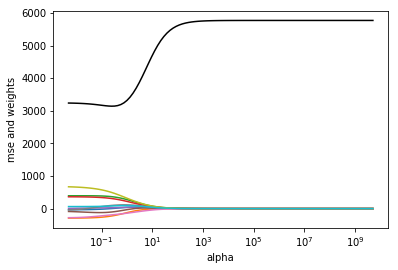

In [6]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

ax = plt.gca()
ax.plot(alphas, mse, 'k') # The change of MSE is plotted as the black curve below
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('mse and weights')

We now run the ridge regression algorithm with a single value of `alpha` ($\lambda$) and compute the error for this value


In [7]:
ridge2 = Ridge(alpha = 2, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print("The coefficients: ", pd.Series(ridge2.coef_)) # Print coefficients
print("The test MSE: ",mean_squared_error(y_test, pred2)) # Calculate the test MSE


The coefficients:  0     42.237490
1    -73.100239
2    209.494551
3    164.823049
4     47.872000
5      0.389126
6   -109.957369
7    103.279663
8    229.645849
9     85.261945
dtype: float64
The test MSE:  3615.412851924988


Lets try a different choice of `alpha` ($\lambda$)

In [8]:
ridge3 = Ridge(alpha = 10**2, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print("The coefficients: ",pd.Series(ridge3.coef_)) # Print coefficients
print("The test MSE: ",mean_squared_error(y_test, pred3))    # Calculate the test MSE


The coefficients:  0    3.599178
1   -0.745193
2    9.333601
3    7.303540
4    4.468217
5    3.273716
6   -5.529993
7    6.902772
8    9.790434
9    5.627995
dtype: float64
The test MSE:  5617.4093492670745


If we wanted no overfit penalty, we can set `alpha` $ = 0 $ (i.e. $\lambda=0$) 

In [9]:
ridge0 = Ridge(alpha = 0, normalize = True)
ridge0.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred0 = ridge0.predict(X_test)           # Use this model to predict the test data
print("The coefficients: ", pd.Series(ridge0.coef_)) # Print coefficients
print("The test MSE: ",mean_squared_error(y_test, pred0))   # Calculate the test MSE


The coefficients:  0    -36.643422
1   -293.739539
2    393.338678
3    363.908243
4     -7.896308
5    -72.915303
6   -281.272107
7    -51.902173
8    681.851964
9     61.988555
dtype: float64
The test MSE:  3246.3477725695875


To try all the different choices for `alpha` ($\lambda$) we create above, we can use `RidgeCV`.

In [10]:
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train) # the default 3-fold cross-validation
ridgecv.alpha_ #The best alpha in our numpy array called alpha_

0.08148754173103201

Now that we have found the correct value of `alpha` ($\lambda$), we run the algorithm on the entire training set and test the data on the test set

In [11]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

3181.721930777545

If we run the data on all data we get the following coefficients

In [12]:
#ridge4.fit(X_train, y)
print('The coefficient: ')
print(ridge4.coef_)

The coefficient: 
[ -20.3459919  -269.47327928  389.68741337  343.63966227   20.67752553
 -122.50227928 -228.98413938   51.7393743   589.31413844   68.42179808]


# LASSO
LASSO regression doesn't have a closed form solution.  The algorithm will perform coordinate descent (it is very similar to gradient descent).

In the code below, we will show how the different overfit penalties affect the coefficients (similarly to what we did above for ridge regression).

Text(0,0.5,'weights')

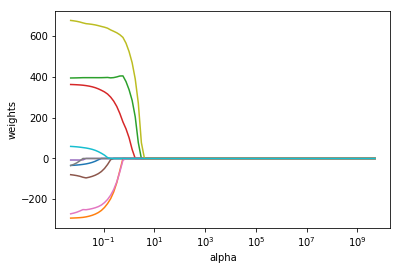

In [13]:
lasso = Lasso(max_iter = 10000, normalize = True)
# The default is to set the maximum number of iterations to be 1000.  
# To over ride this parameter set the parameter as was done above
coefs = []
mse = []
for a in alphas:
    lasso.set_params(alpha=a) # Our instance now uses a different alph
    lasso.fit(X_train, y_train) # running the LASSO algorithm
    coefs.append(lasso.coef_) # accessing the coefficients produced from fitting the data
    mse.append(mean_squared_error(y_test, lasso.predict(X_test)))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')

We can plot the mse and the coefficent on the same plot.  Note the scale has changed.

Text(0,0.5,'mse and weights')

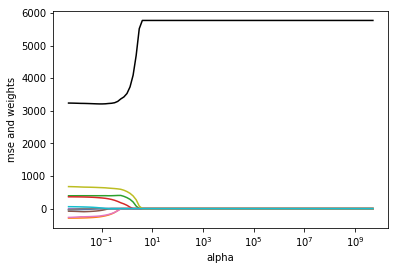

In [14]:
ax = plt.gca()
ax.plot(alphas, mse,'k')
ax.plot(alphas, coefs)

ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('mse and weights')

In [15]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 300000, normalize = True)
#alphas = None "List of alphas where to compute the models. If None alphas are set automatically"
lassocv.fit(X_train, y_train) # we could predict with this instance.  lassocv.predict(X_new)

lasso.set_params(alpha=lassocv.alpha_ ) # Here is how we use LASSO where we set the parameter
lasso.fit(X_train, y_train)
print('The best alpha: ', lassocv.alpha_ )
print('The test MSE: ', mean_squared_error(y_test, lasso.predict(X_test)))

The best alpha:  0.0767587540106735
The test MSE:  3214.7569658297507


In [16]:
# Some of the coefficients are now reduced to exactly zero.
print(lasso.coef_)

[  -0.         -256.90522359  395.5837165   335.24402978   -0.
  -66.48362415 -229.94062574   -0.          647.04658586   27.00180106]


In [17]:
print(lasso.intercept_)

155.2101067776533
